In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('data.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [36]:
x = dataset.iloc[:,[3,4]].values
print(x.shape)

(200, 2)


In [17]:
class Cluster:
    def __init__(self, center, color):
        self.center = center
        self.color = color
        self.points = list()
    def __str__(self):
        return "Cluster <{}>".format(self.color)
    
    def __repr__(self):
        return "Cluster <{}>".format(self.color)
    
    def update_center(self):
        if not self.points:
            return self.center
        
        new_center = np.array(self.points).mean(axis=0)
        self.center = new_center
        return new_center

In [63]:
class KMeansClustering:
    
    def __init__(self, k, clusters, dataset, centers):
        self.k = k
        self.clusters = clusters
        self.dataset = dataset
        self.centers = centers
        self.inertias = list()
        
    def run(self, iterations=1):
        for _ in range(iterations):
#             self.calculate_distances()
#             self.assign_cluster()
            self.assign_closest_cluster()
            self.update_cluster_centers()
            self.inertias.append(self.calculate_inertia())


    def assign_closest_cluster(self):
        for cluster in self.clusters:
            cluster.points = list()
            
        for point in self.dataset:
            
            distances = [] 
            
            for cluster in self.clusters:
                d = KMeansClustering.euclidean(point, cluster.center)
                distances.append((d, cluster))
        
            distances = sorted(distances, key=lambda x: x[0])
            closest_cluster = distances[0][1]
            closest_cluster.points.append(point)
            
    def update_cluster_centers(self):
        new_centers = []
        for cluster in self.clusters:
#             new_center = np.array(cluster.points).mean(axis=0)
#             cluster.center = new_center
            new_centers.append(cluster.update_center())
        self.centers = new_centers
        
    
            
    def calculate_inertia(self):
        inertia = 0
        
        for cluster in self.clusters:
            for point in cluster.points:
                inertia += KMeansClustering.euclidean(point, cluster.center)
        return inertia
    
            
    @staticmethod
    def euclidean(p1, p2):
        return np.sqrt(np.sum((p1 - p2)**2))

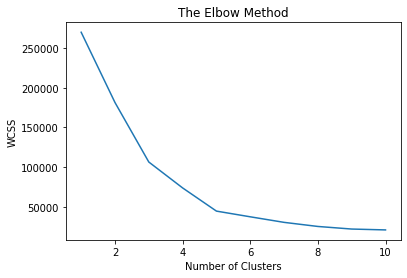

In [64]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:
len(x)

200

In [66]:
# We choose 5 as the number of clusters
k = 5
random_centers = np.random.uniform(low = x.min(), high = x.max(), size = (k, len(x)))
colors=['red', 'green', 'blue', 'yellow', 'pink']

In [67]:
clusters = []
for center, color in zip(random_centers, colors):
    clusters.append(Cluster(center, color))
clusters

[Cluster <red>,
 Cluster <green>,
 Cluster <blue>,
 Cluster <yellow>,
 Cluster <pink>]

In [76]:
kmeans = KMeansClustering(k, clusters, x, random_centers)
kmeans.k

5

In [79]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(x)

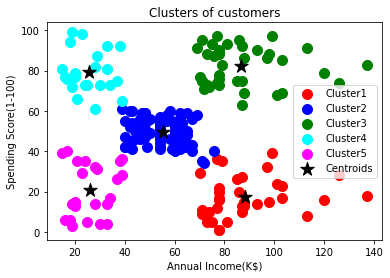

In [83]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='magenta',label='Cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker = '*',s = 200,c='black',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(K$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()